Objective: Create a model that predicts whether or not a loan will be default using historical data.

Problem Statement:
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. Using historical data from 2007 to 2015, a deep learning model has been built to predict the chance of default for future loans.

Domain: Finance

Analysis to be done:
Perform data preprocessing and build a deep learning prediction model.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
loan_data=pd.read_csv('/content/gdrive/My Drive/Deep Learning Notebooks/Projects/Lending Club Loan/loan_data-2.csv')

In [4]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


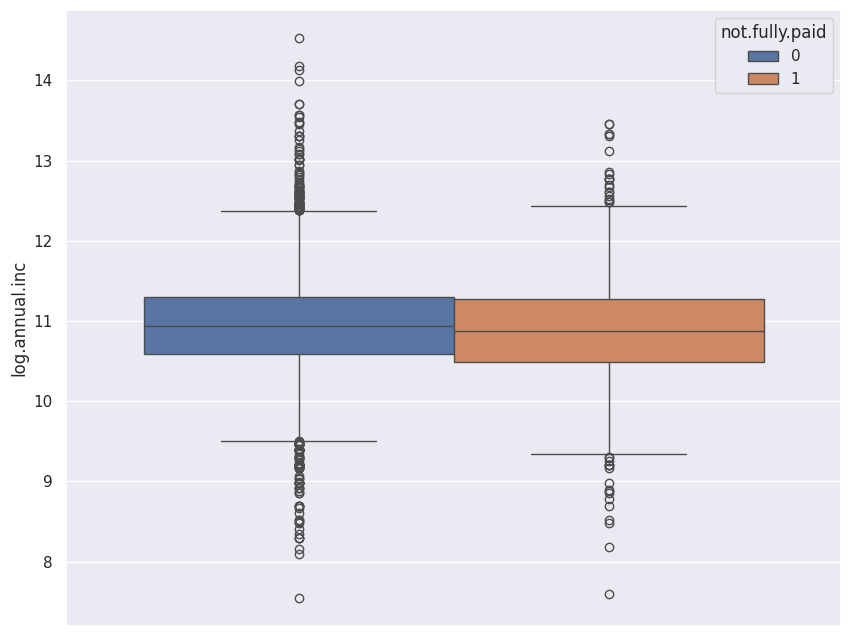

In [70]:
sns.boxplot(y='log.annual.inc',hue='not.fully.paid',data=loan_data)
#log.annual.inc: The natural log of the self-reported annual income of
#the borrower.
#not.fully.paid: 0 → The loan was fully paid. 1 → The loan was not fully
#paid (i.e., defaulted, charged off, or missed payments).
plt.show()

There is not much of a difference between the annual incomes of those whose loans do not get paid off vs. those who pay off their loans.

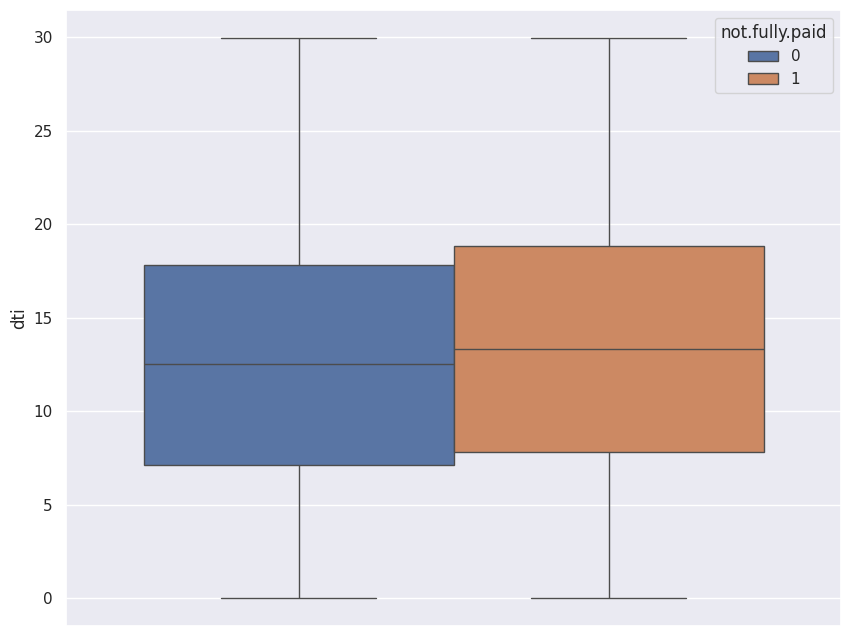

In [69]:
sns.boxplot(y='dti',hue='not.fully.paid',data=loan_data)
#dti: the debt-to-income ratio of the borrower (the amount of debt divided by
#annual income).
#not.fully.paid: 0 → The loan was fully paid. 1 → The loan was not fully
#paid (i.e., defaulted, charged off, or missed payments).
plt.show()

The debt to income ratio for those for those who do not pay off their loans are higher for those who do not pay off their loans but the difference is not as much as expected.

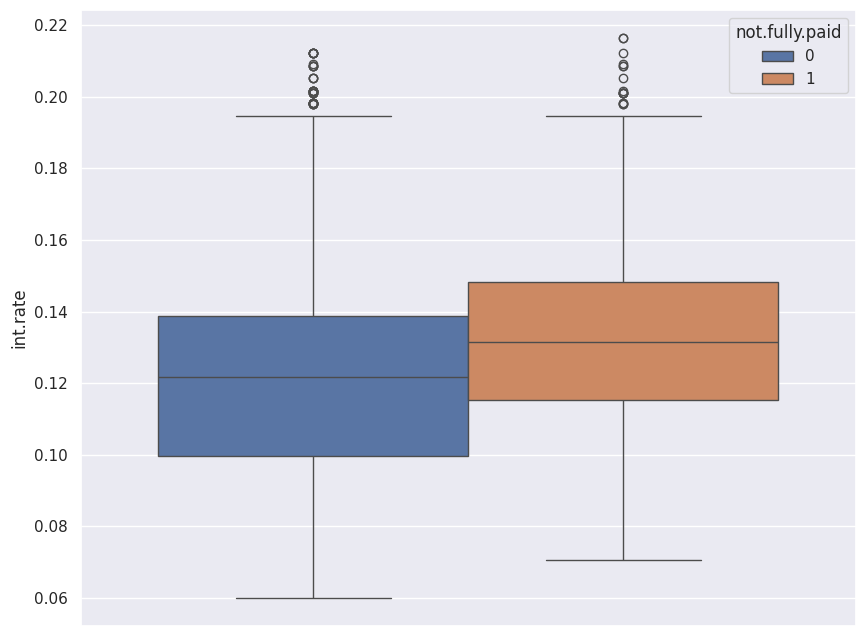

In [138]:
sns.boxplot(y='int.rate',hue='not.fully.paid',data=loan_data)
#int.rate: The interest rate of the loan, as a proportion (a rate of 11% would
#be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are
#assigned higher interest rates.
#not.fully.paid: 0 → The loan was fully paid. 1 → The loan was not fully
#paid (i.e., defaulted, charged off, or missed payments).
plt.show()

The box chart on interest rates show that higher interest rates are related higher levels of defaults.

<Axes: xlabel='purpose'>

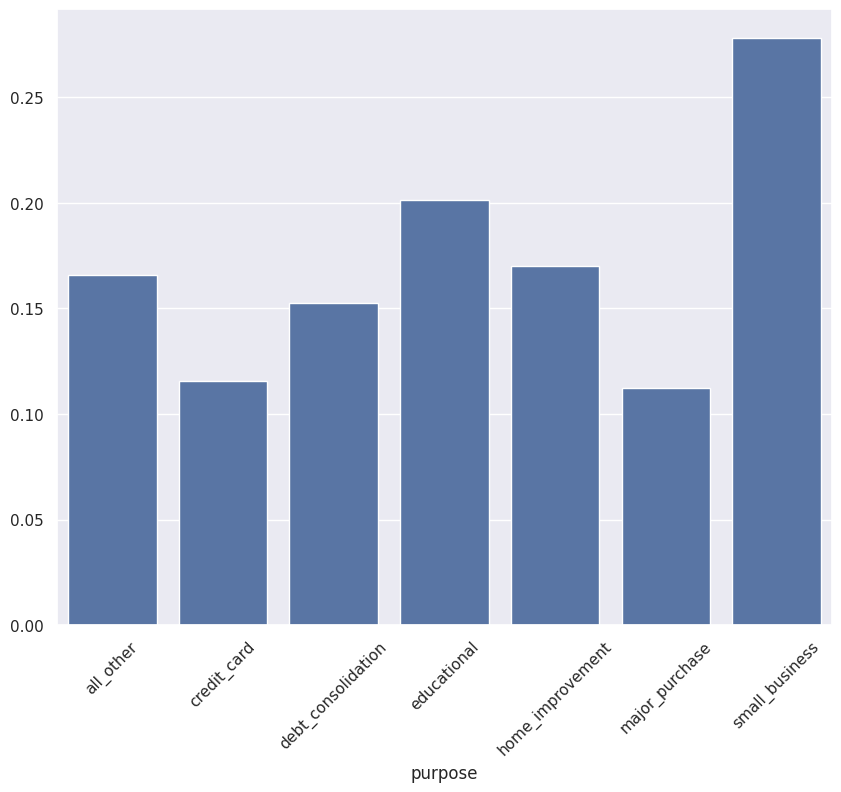

In [137]:
purpose_ratio=loan_data.groupby('purpose')['not.fully.paid'].mean()
plt.xticks(rotation=45)
sns.barplot(y=purpose_ratio.values,x=purpose_ratio.index)

The barplot indicates that the largest percentage of defaults occur from small businesses, educational purposes, and all other purposes.  The lowest percentage of those who defaulted are those for credit cards.

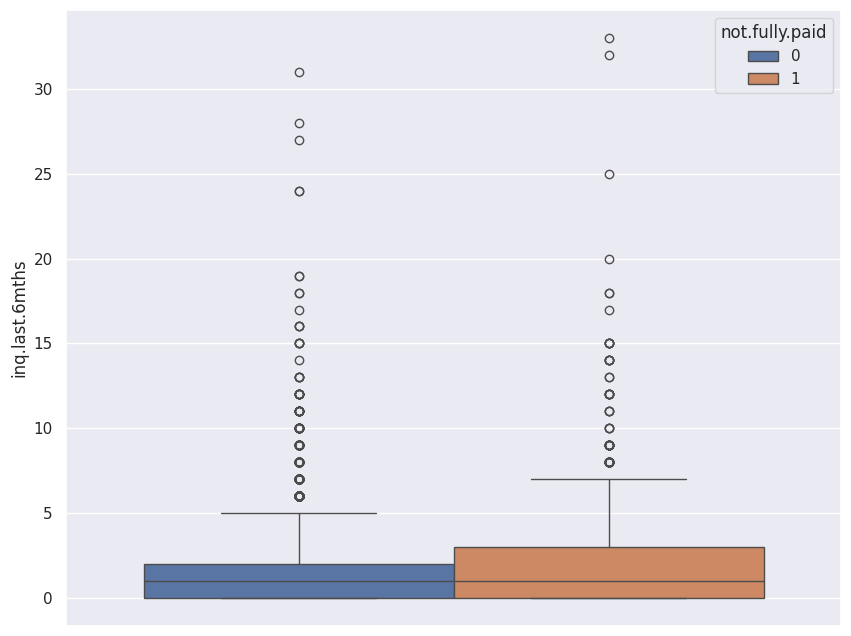

In [68]:
sns.boxplot(y='inq.last.6mths',hue='not.fully.paid',data=loan_data)
#inq.last.6mths: The amount of borrower's inquiries by creditors in the last 6
#months.
#not.fully.paid: 0 → The loan was fully paid. 1 → The loan was not fully
#paid (i.e., defaulted, charged off, or missed payments).
plt.show()

When there are more inquiries the past 6 months, there will be a higher number of defaults.

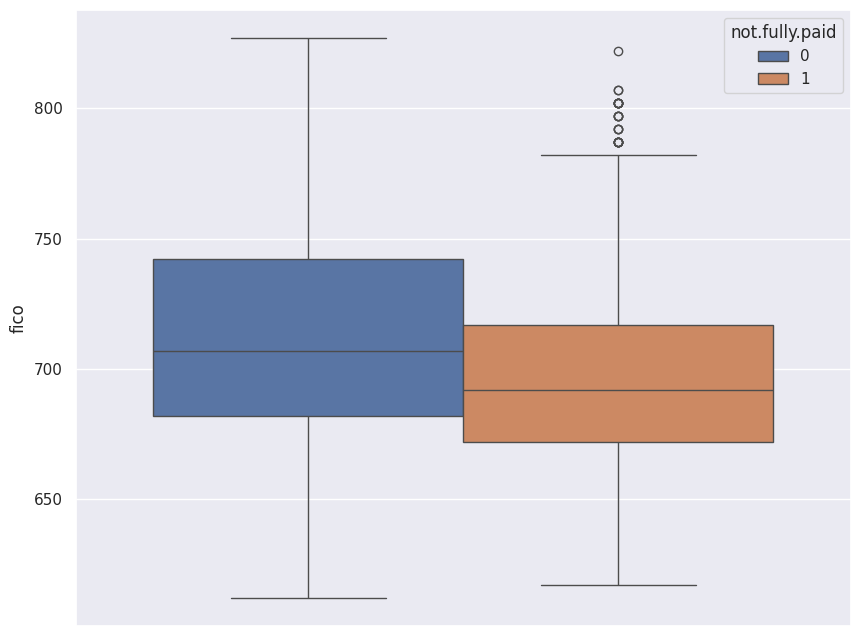

In [67]:
sns.boxplot(y='fico',hue='not.fully.paid',data=loan_data)
#fico: The FICO credit score of the borrower.
#not.fully.paid: 0 → The loan was fully paid. 1 → The loan was not fully
#paid (i.e., defaulted, charged off, or missed payments).
plt.show()

The FICO score tells the highest cause of default shown by its largest separation on the box plot.  When loans with the lower FICO scores end up defaulting more often.

<Axes: ylabel='pub.rec'>

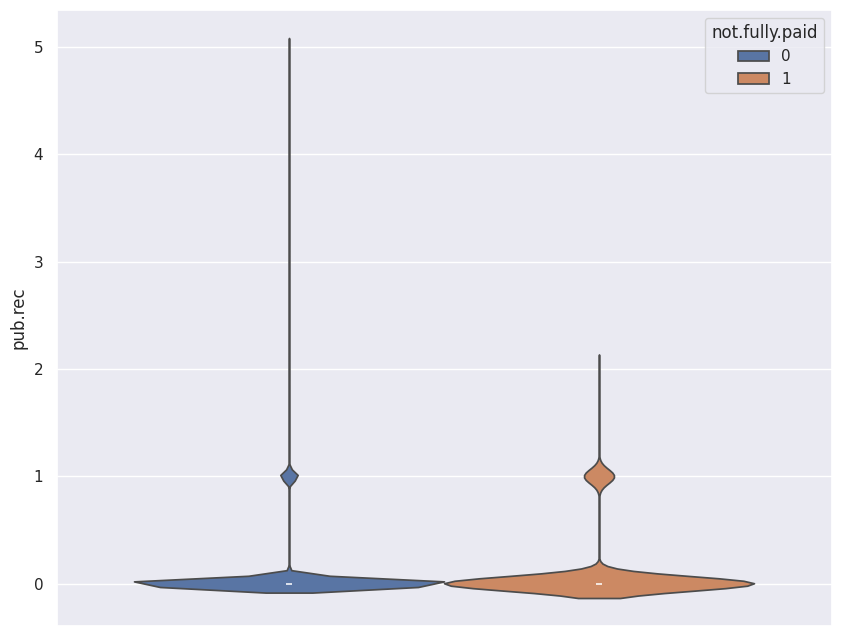

In [72]:
sns.violinplot(y=loan_data['pub.rec'],hue=loan_data['not.fully.paid'])
#pub.rec: The borrower's number of derogatory public records
#(bankruptcy filings, tax liens, or judgments).
#not.fully.paid: 0 → The loan was fully paid. 1 → The loan was not fully
#paid (i.e., defaulted, charged off, or missed payments).

In [24]:
sns.pairplot(data=loan_data, hue='not.fully.paid')
#pairplot of loan_data-2.csv
#relationship between various factors with each other
plt.show()

Output hidden; open in https://colab.research.google.com to view.

The pairplot above shows the relationship every variable has with one another.  A large negative correlation fico scores and interest rates.

In [26]:
from sklearn.decomposition import PCA

In [27]:
# PCA is unsupervised method for dimensionality reduction in data
pca = PCA(n_components=14)

In [28]:
input_matrix = np.loadtxt('/content/gdrive/My Drive/Deep Learning Notebooks/Projects/Lending Club Loan/input.csv', delimiter=",", ndmin=2).astype(np.float32)

### Step 6: Load the Input Data
Loading Input Data:
- It reads the data from the **"input.csv"** file using the np.loadtxt function. It specifies the delimiter as **","** and converts the data to a NumPy array of type **np.float32**. The resulting array is stored in the variable **input_matrix**.

In [29]:
input_matrix.shape

(9578, 18)

In [30]:
type(input_matrix[0][0])

numpy.float32

In [31]:
labels = np.loadtxt('/content/gdrive/My Drive/Deep Learning Notebooks/Projects/Lending Club Loan/output.csv',delimiter=",", ndmin=2).astype(np.float32)
type(labels[0][0])

numpy.float32

In [32]:
import tensorflow as tf

In [33]:
from math import floor,ceil

In [34]:
train_size = 0.75
train_cnt = floor(input_matrix.shape[0] * train_size)
x_train = input_matrix[0:train_cnt]
y_train = labels[0:train_cnt]
x_test = input_matrix[train_cnt:]
y_test = labels[train_cnt:]

In [35]:
x_train.shape

(7183, 18)

In [36]:
y_train.shape

(7183, 2)

In [37]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [38]:
y_test.shape

(2395, 2)

In [39]:
learning_rate = 0.001
training_epochs = 1000
batch_size = 10

In [40]:
n_classes = labels.shape[1]
n_samples = 9578
n_inputs = input_matrix.shape[1]

In [41]:
n_samples

9578

In [42]:
n_inputs

18

In [43]:
#hidden layers is taken 15
n_hidden_1 = 15
n_hidden_2 = 15

In [56]:
#Defining the multilayer perceptron function
def multilayer_network(X,weights,biases,keep_prob=None):
#X: Placeholder for data inputs
#weights: dictionary of weights
#biases: dictionary of bias values
#first hidden layer with sigmoid activation
  layer_1 = tf.add(tf.linalg.matmul(X,weights['h1']),biases['h1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  if keep_prob is not None:
    layer_1 = tf.nn.dropout(layer_1,keep_prob)
#second hidden layer
  layer_2 = tf.add(tf.linalg.matmul(layer_1,weights['h2']),biases['h2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  if keep_prob is not None:
    layer_2 = tf.nn.dropout(layer_2,keep_prob)
#output layer
  out_layer = tf.linalg.matmul(layer_2,weights['out']) + biases['out']

  return out_layer


In [57]:
#defining the weights and biases dictionary
weights = {
    'h1': tf.Variable(tf.random.normal([n_inputs,n_hidden_1]),name='W_input'),
    'h2': tf.Variable(tf.random.normal([n_hidden_1,n_hidden_2]),name='W_layer1'),
    'out': tf.Variable(tf.random.normal([n_hidden_2,n_classes]),name='W_layer2')
}
biases = {
    'h1': tf.Variable(tf.random.normal([n_hidden_1]),name='b_input'),
    'h2': tf.Variable(tf.random.normal([n_hidden_2]),name='b_layer1'),
    'out': tf.Variable(tf.random.normal([n_classes]),name='b_layer2')
}


In [62]:
keep_prob = 0.8
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(len(x_train) / batch_size)
    x_batches = np.array_split(x_train, total_batch)
    y_batches = np.array_split(y_train, total_batch)
    for i in range(total_batch):
        batch_x, batch_y = x_batches[i], y_batches[i]
# Make sure to pass them as tensor
batch_x = tf.convert_to_tensor(batch_x, dtype=tf.float32)
batch_y = tf.convert_to_tensor(batch_y, dtype=tf.float32)

with tf.GradientTape() as tape:
    predictions = multilayer_network(batch_x,weights,biases,keep_prob)
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=predictions,labels=batch_y))
    gradients = tape.gradient(loss, list(weights.values()) + list(biases.values()))
    optimizer.apply_gradients(zip(gradients, list(weights.values()) + list(biases.values())))
    avg_cost += loss / total_batch

print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

Epoch: 1000 cost= 0.003291132


In [65]:
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

predictions = multilayer_network(x_test_tensor,weights,biases)
correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y_test_tensor, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', accuracy.numpy())
print ('---------------')

print("Model has completed {} epochs of training".format(training_epochs))


Accuracy: 0.7361169
---------------
Model has completed 1000 epochs of training


**Observation:**

The output indicates the progress and results of training a multilayer perceptron model:

- **"Epoch: 1000 cost= 0.003291132"** represents the cost (loss) value after the completion of the 1000th epoch. This value measures how well the model's predictions match the actual labels. Lower values indicate better performance.
- **"Accuracy: 0.7361169"** denotes the accuracy of the model on the test data after 1000 epochs of training. It represents the proportion of correctly classified instances, with higher values indicating better accuracy.
- **"---------------"** serves as a separator to distinguish the output for each epoch during training.
- **"Model has completed 1000 epochs of training"** indicates that the model has finished training for the specified number of epochs, in this case, 1000.